# Canadian House Price Prediction
 ## Nurşah Satılmış

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from sklearn import tree
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# 1. Data Preprocessing



## 1.1. Explaratory Data Analysis

* Check for missing values
* Check redundant columns
* Visualize the features with histograms to understand the distribution of data
* Visualize the target variable with respect to the features 
* Visualize the correlation between the features using a heatmap


In [29]:
#Create dataFrame
df = pd.read_csv('HouseListings-Top45Cities-10292023-kaggle.csv', encoding='latin-1')

house_df = df.copy()
house_df.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


 Adress express the information that province and city give .Therefore city and province features  should be removed. Keeping only the Adress information simplifies the dataset without losing relevant details.


In [30]:
#drop province and city
house_df.drop(columns=["Province","City"], inplace=True)


In [ ]:
house_df.columns

Index(['Price', 'Address', 'Number_Beds', 'Number_Baths', 'Population',
       'Latitude', 'Longitude', 'Median_Family_Income'],
      dtype='object')

In [31]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,35768.0,943296.251812,1.020110e+06,21500.0000,459900.0000,699000.0000,1.095000e+06,3.700000e+07
Number_Beds,35768.0,3.283661,1.730654e+00,0.0000,2.0000,3.0000,4.000000e+00,1.090000e+02
Number_Baths,35768.0,2.532403,1.371910e+00,0.0000,2.0000,2.0000,3.000000e+00,5.900000e+01
Population,35768.0,636015.093268,1.120016e+06,63382.0000,109167.0000,242460.0000,5.228880e+05,5.647656e+06
Latitude,35768.0,47.446556,3.333855e+00,42.2833,43.8667,49.0250,4.988810e+01,5.391690e+01
Longitude,35768.0,-98.421636,2.228094e+01,-123.9364,-122.3167,-104.6067,-7.986670e+01,6.310050e+01
Median_Family_Income,35768.0,89643.103416,1.213235e+04,62400.0000,82000.0000,89000.0000,9.700000e+04,1.330000e+05


In [32]:
#check datatypes 
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 35768 non-null  float64
 1   Address               35768 non-null  object 
 2   Number_Beds           35768 non-null  int64  
 3   Number_Baths          35768 non-null  int64  
 4   Population            35768 non-null  int64  
 5   Latitude              35768 non-null  float64
 6   Longitude             35768 non-null  float64
 7   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 2.2+ MB


Except Adress, all features has numerical values

In [33]:
#Check for missing values
house_df.isnull().sum()

Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

No missing value detected.

In [34]:
# check duplicates 
house_df[house_df.duplicated()]

,Price,Address,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
637,599900.0,#805 -181 BEDFORD RD,2,1,5647656,43.7417,-79.3733,97000.0
1037,929000.0,166 HIAWATHA RD W,3,2,5647656,43.7417,-79.3733,97000.0
1314,799900.0,307-6699 DUNBLANE AVENUE,2,2,2426160,49.2500,-123.1000,90000.0
1369,1898000.0,792 E 11TH AVENUE,3,4,2426160,49.2500,-123.1000,90000.0
1389,790000.0,1909-2024 FULLERTON AVENUE,2,2,2426160,49.2500,-123.1000,90000.0
...,...,...,...,...,...,...,...,...
35672,925000.0,4170 rue Notre-Dame Est,3,2,139163,46.3500,-72.5500,62400.0
35673,347000.0,6980 rue de Honfleur,5,2,139163,46.3500,-72.5500,62400.0
35674,279900.0,1014-1016-1018,5,2,139163,46.3500,-72.5500,62400.0
35675,272000.0,5894 rue de la Seine,2,1,139163,46.3500,-72.5500,62400.0


2518 rows detected as duplicated , but when we examine the rows we can see that some features same but some features lıke number of baths , beds etc different.Therefore , I will keep those rows.


array([[<AxesSubplot: title={'center': 'Price'}>,
        <AxesSubplot: title={'center': 'Number_Beds'}>,
        <AxesSubplot: title={'center': 'Number_Baths'}>],
       [<AxesSubplot: title={'center': 'Population'}>,
        <AxesSubplot: title={'center': 'Latitude'}>,
        <AxesSubplot: title={'center': 'Longitude'}>],
       [<AxesSubplot: title={'center': 'Median_Family_Income'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

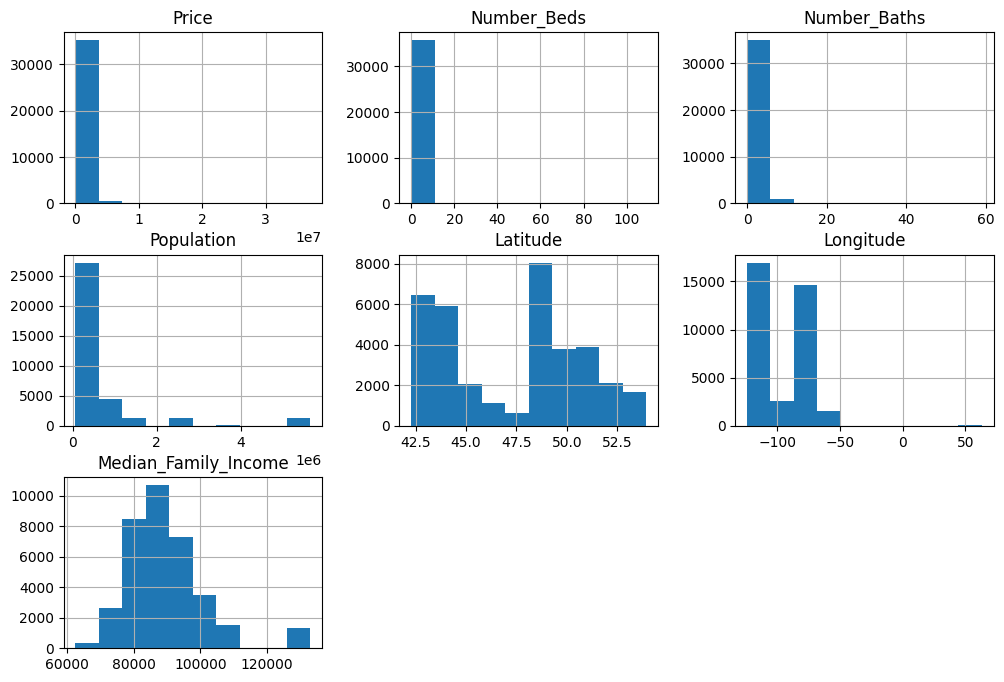

In [36]:
#hPlot hıstograms to see distrubition
house_df.hist(figsize=(12,8))

## 1.2. Outlier Detection and Handling 


Some regression models sensitive to outliers , so outlier handling might be beneficial.

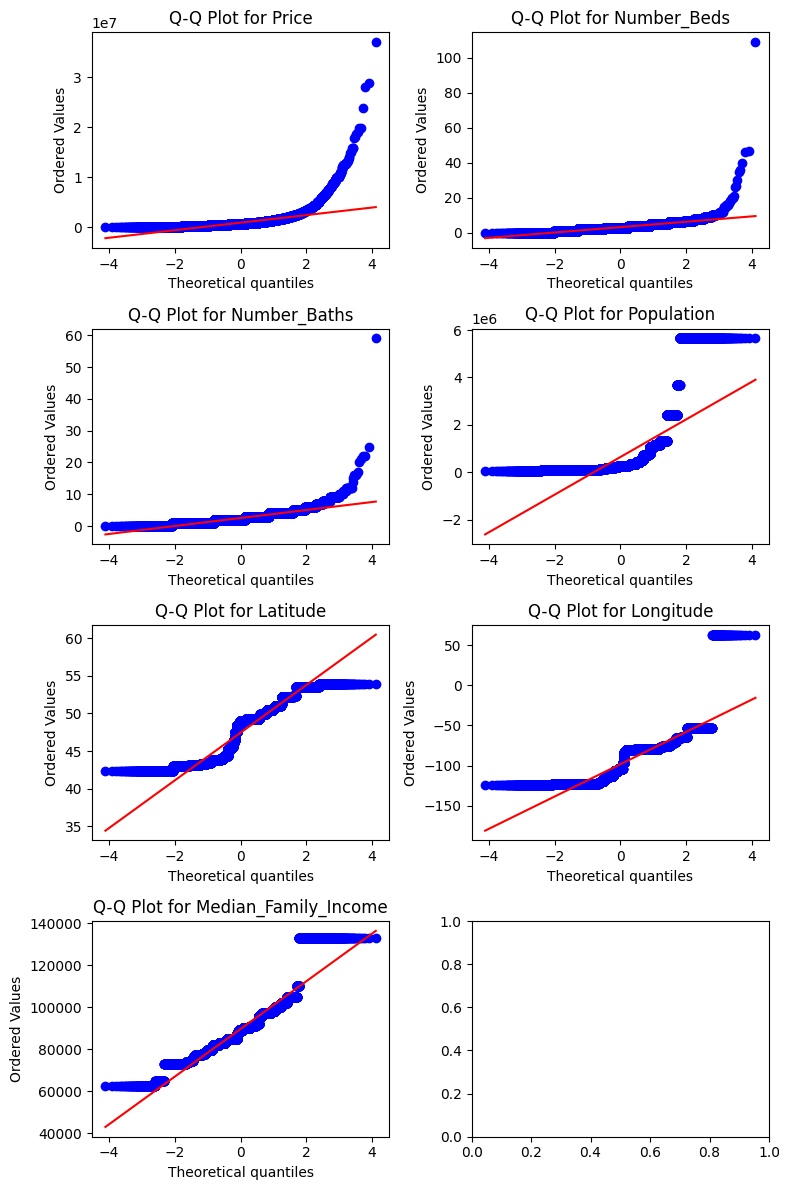

In [37]:
# Plot Q-Q plots to check whether data normally distrubuted or not.

numerical_columns = house_df.select_dtypes(include=['int64', 'float64']).columns

# Create subplots
num_plots = len(numerical_columns)
num_rows = num_plots // 2 + num_plots % 2  # Calculate number of rows needed
fig, axes = plt.subplots(num_rows, 2, figsize=(8, 3 * num_rows))

axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    probplot_results = probplot(house_df[column], plot=axes[i])
    axes[i].set_title(f"Q-Q Plot for {column}")

plt.tight_layout()
plt.show()


Data is not normally distrubuted exactly. Z-score outlier detection is not proper for this data set.IQr is used for outlier detection


In [38]:

def detect_outliers_IQR( frame ):
    Q1 = frame.quantile(0.25)
    Q3 = frame.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    return lower_bound, upper_bound




In [39]:
def box_plot (column):
    if column != 'id' and np.issubdtype(house_df[column].dtype, np.number):

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4)) 
        axes = axes.flatten()
        

        # Plot boxplot for the original dataframe (df)
        sns.boxplot(y=df[column], ax=axes[0])
        axes[0].set_title(f'Before outlier handling for {column}')
        axes[0].tick_params(axis='x', rotation=45)
        
        # Plot boxplot for the modified dataframe (house_df)
        sns.boxplot(y=house_df[column], ax=axes[1])
        axes[1].set_title(f'After outlier handling for {column}')
        axes[1].tick_params(axis='x', rotation=45)
        plt.tight_layout()
        plt.show()

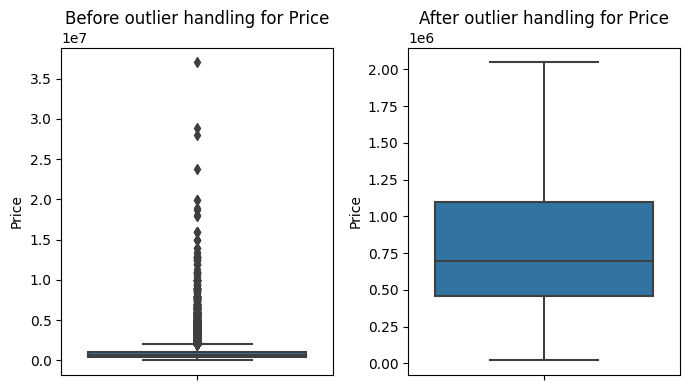

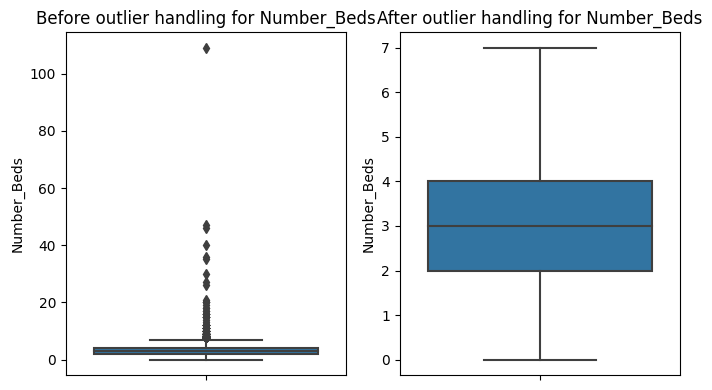

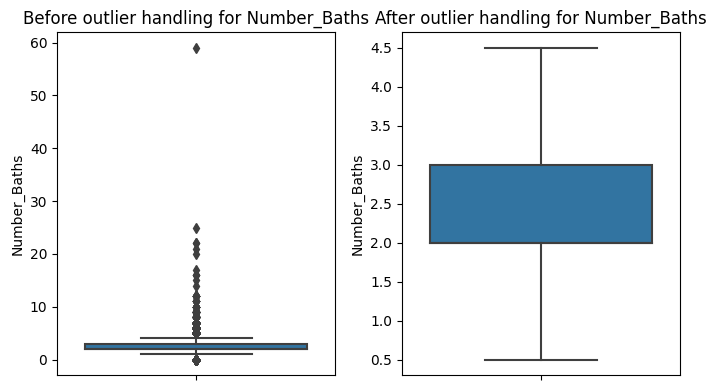

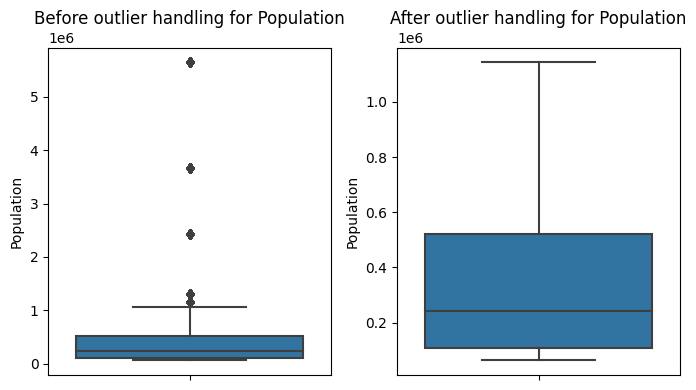

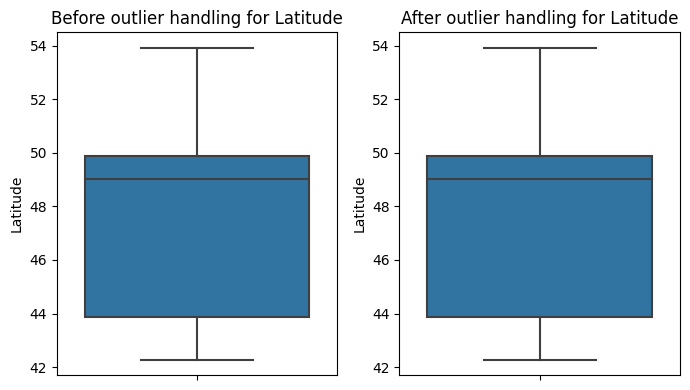

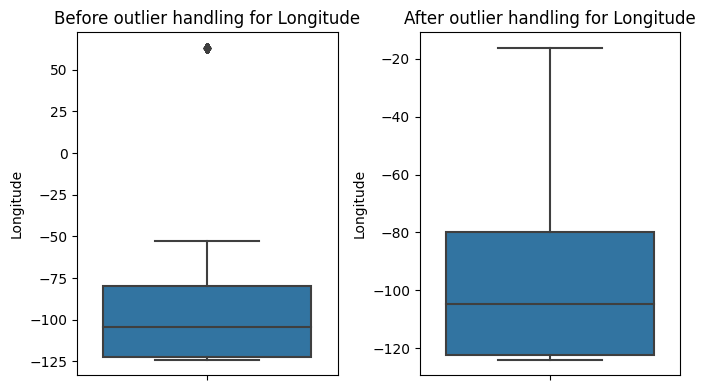

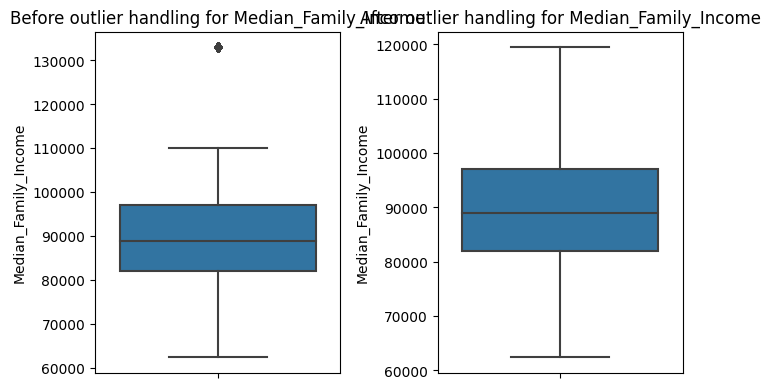

In [40]:
#Show outlier handling by box plot.
for columns in house_df.columns:
  if np.issubdtype(house_df[columns].dtype, np.number):                    

    #Data is not normally distributed.Apllying IQR. 
    lower_bound, upper_bound = detect_outliers_IQR(house_df[columns])
    # Apply clipping
    house_df.loc[house_df[columns] < lower_bound, columns] = lower_bound
    house_df.loc[house_df[columns] > upper_bound, columns] = upper_bound
    box_plot(columns)


### 1.4. Encoding

Encode the categorical features for models , because  machine learning algorithms require numerical input. Label encoding provides a way to convert categorical data into a numerical format that can be fed into these algorithms.

In [41]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

# Fit and transform the ordinal column
house_df['Address'] = le.fit_transform(df['Address'])
house_df.head()


,Price,Address,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
0,779900.0,1311,3,2.0,1143469.5,43.7417,-79.3733,97000.0
1,799999.0,2148,3,1.0,1143469.5,43.7417,-79.3733,97000.0
2,799900.0,2058,2,2.0,1143469.5,43.7417,-79.3733,97000.0
3,1200000.0,16215,4,2.0,1143469.5,43.7417,-79.3733,97000.0
4,668800.0,1601,1,1.0,1143469.5,43.7417,-79.3733,97000.0


### 1.3. Normalization


In [42]:

# Iterate over each numeric column and perform z-score normalization
for column in house_df:
    mean = np.mean(house_df[column])
    std_dev = np.std(house_df[column])

    # Apply z-score normalization to each value in the column
    house_df[column] = (house_df[column] - mean) / std_dev
house_df  


,Price,Address,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
0,-0.112974,-1.614432,-0.170234,-0.423747,1.937369,-1.111298,0.910281,0.749471
1,-0.074695,-1.521160,-0.170234,-1.341216,1.937369,-1.111298,0.910281,0.749471
2,-0.074884,-1.531189,-0.853078,-0.423747,1.937369,-1.111298,0.910281,0.749471
3,0.687114,0.046410,0.512610,-0.423747,1.937369,-1.111298,0.910281,0.749471
4,-0.324566,-1.582115,-1.535921,-1.341216,1.937369,-1.111298,0.910281,0.749471
...,...,...,...,...,...,...,...,...
35763,-0.760510,0.162526,-0.853078,-0.423747,0.066029,-0.768147,3.897957,-0.227464
35764,2.301479,-1.189192,1.195454,1.869925,0.066029,-0.768147,3.897957,-0.227464
35765,-0.798601,-0.307956,-0.853078,-0.423747,0.066029,-0.768147,3.897957,-0.227464
35766,0.210794,-1.468896,-0.170234,-1.341216,0.066029,-0.768147,3.897957,-0.227464


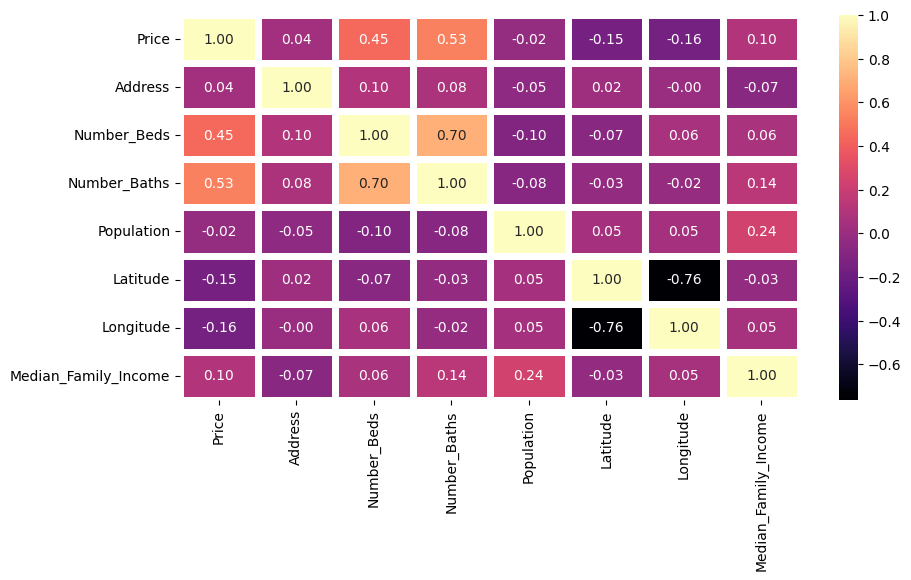

In [43]:
#Display heatmap to see corrolations.
plt.figure(figsize=(10,5))

sns.heatmap(house_df.corr(),annot=True,cmap=plt.cm.magma,fmt=".2f",linewidths=5)
plt.show()

Number_Beds , Number_Baths is highly corrolated with target features. On the other hand , population and target variable has lowest corrolation.


### 1.5 PCA
Our dataset is large and we have 7 predictors So, PCA reduce the size of data without any loss of ınformation.


In [44]:
# Using 7 components to capture all possible variance
pca = PCA(n_components=7) 
principal_components = pca.fit_transform(house_df.drop("Price",axis=1)) 
variance_ratio = pca.explained_variance_ratio_



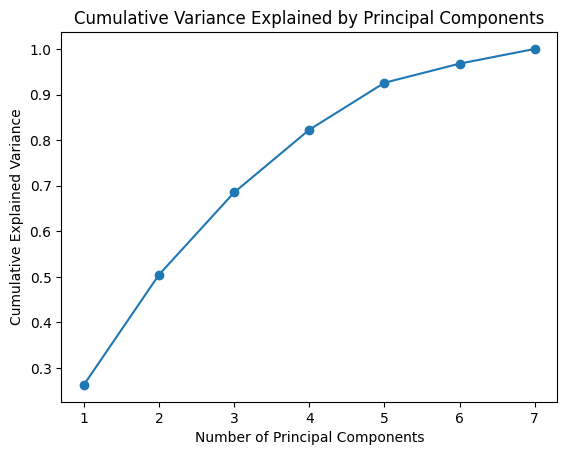

In [45]:

#Visualize the  cumulative variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()



According to graph 5 component is enough to explain the data.

In [46]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(house_df)


# 2. REGRESSION


%80 train %20 test set splitted.

In [47]:

# Calculate the split index 
split_index = int(0.8 * len(house_df))

# Split the data into training and testing sets
train_set = house_df[:split_index]
test_set = house_df[split_index:]
 
x_train = train_set.drop(["Price"],axis=1)
y_train = train_set["Price"]

x_test = test_set.drop(["Price"],axis=1)
y_test = test_set["Price"]

In [48]:
# check  train set
train_set

,Price,Address,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
0,-0.112974,-1.614432,-0.170234,-0.423747,1.937369,-1.111298,0.910281,0.749471
1,-0.074695,-1.521160,-0.170234,-1.341216,1.937369,-1.111298,0.910281,0.749471
2,-0.074884,-1.531189,-0.853078,-0.423747,1.937369,-1.111298,0.910281,0.749471
3,0.687114,0.046410,0.512610,-0.423747,1.937369,-1.111298,0.910281,0.749471
4,-0.324566,-1.582115,-1.535921,-1.341216,1.937369,-1.111298,0.910281,0.749471
...,...,...,...,...,...,...,...,...
28609,0.210984,-1.059369,-2.218765,-1.799950,-0.860619,0.528028,-1.148497,-0.680609
28610,-0.836714,-0.304725,-1.535921,-1.341216,-0.860619,0.528028,-1.148497,-0.680609
28611,-0.076598,-0.601925,-0.853078,-0.423747,-0.860619,0.528028,-1.148497,-0.680609
28612,-0.076598,-1.123891,-0.853078,-0.423747,-0.860619,0.528028,-1.148497,-0.680609


In [49]:
#Split the data which applyed PCA
y = house_df["Price"]
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2,shuffle=False)

In [50]:
X_train_pca

array([[-0.417455  ,  1.66710136, -2.15696894, -0.76052103, -0.9440158 ],
       [-0.93503239,  1.75060562, -2.11088672, -0.64829684, -0.94178144],
       [-0.78245427,  1.68695705, -2.17775573, -0.68534306, -0.92016287],
       ...,
       [-0.98937873, -1.13900854,  0.72979244, -0.93473564,  0.0763526 ],
       [-1.03946339, -1.11441181,  0.57156348, -1.41997764,  0.01381946],
       [-1.93576207, -1.0743213 ,  1.36162598,  1.05833106,  0.44850772]])

### 2.1 Multiple Linear Regression

In [51]:
# without pca
multi_linear_regressor = LinearRegression()
multi_linear_regressor.fit(x_train, y_train)
y_pred_multi_linear = multi_linear_regressor.predict(x_test)

In [52]:
#with pca
multi_linear_regressor.fit(X_train_pca, y_train_pca)
y_pred_multi_linear_pca = multi_linear_regressor.predict(X_test_pca)

### 2.1 KNN Regression

In [53]:
class KNNRegression:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        if not isinstance(X_test, np.ndarray):
            X_test = X_test.to_numpy() # Convert DataFrame to NumPy array
        for x in X_test:  
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            nearest_indices = np.argsort(distances)[:self.k]  
            nearest_labels = self.y_train.iloc[nearest_indices]  # Using label-based indexing
            y_pred.append(np.mean(nearest_labels))
        return np.array(y_pred)




After running the execution below, which took 20 minutes on my computer, I found the optimal value for k to be 19.

In [54]:
# Find Optimal K

# Initialize variables to store MSE values  
mse_values = []
# Iterate over different values of k
for k in range(1, 21,1):
    knn_regressor = KNNRegression(k=k)

    # Fit the model to the training data
    knn_regressor.fit(x_train, y_train)

    # Predict the test set
    y_pred_df = knn_regressor.predict(x_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred_df)
    mse_values.append(mse)

# Find the optimal k based on minimum MSE
optimal_k = np.argmin(mse_values) + 1  # Adding 1 because k starts from 1


optimal k  : 13


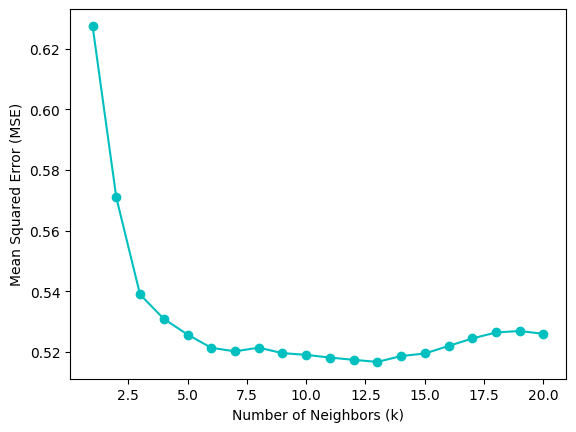

In [55]:

print("optimal k  :",optimal_k)
# Display the plot
plt.plot(range(1, 21), mse_values, marker='o', linestyle='-', color='c', label='MSE')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()


13 is choosen according to graph


In [67]:
knn_regressor = KNNRegression(k=13)

# Fit the model to the training data
knn_regressor.fit(x_train, y_train)
# Predict the test set
y_pred_df = knn_regressor.predict(x_test)


In [68]:
# Find Optimal K for Pca applyed data

# Initialize variables to store MSE values  
mse_values = []
# Iterate over different values of k
for k in range(1, 21,1):
    knn_regressor = KNNRegression(k=k)

    # Fit the model to the training data
    knn_regressor.fit(X_train_pca, y_train_pca)

    # Predict the test set
    y_pred_pca = knn_regressor.predict(X_test_pca)

    # Calculate MSE
    mse = mean_squared_error(y_test_pca, y_pred_pca)
    mse_values.append(mse)

# Find the optimal k based on minimum MSE
optimal_k_pca = np.argmin(mse_values) + 1  # Adding 1 because k starts from 1
optimal_k_pca

20

optimal k  : 20


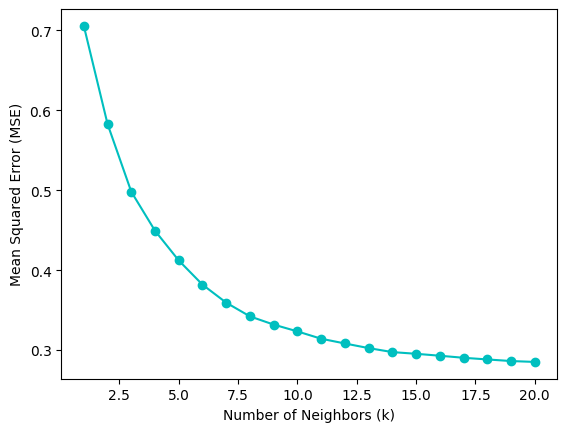

In [70]:

print("optimal k  :",20)
# Display the plot
plt.plot(range(1, 21), mse_values, marker='o', linestyle='-', color='c', label='MSE')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()


In [ ]:
knn_regressor_pca = KNNRegression(k=13)

# Fit the model to the training data
knn_regressor_pca.fit(X_train_pca, y_train_pca)
# Predict the test set
y_pred_knn_pca = knn_regressor_pca.predict(x_test_pca)

k= 20 is Found by Graph

### 2.3 Random Forest Regression

Find best parameters and built model with those parameters

In [58]:
#hyperparameter tunning (execution takes 10m)
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,7],
            'n_estimators' : [ 200, 500, 1000]}
rf_model = RandomForestRegressor(random_state = 42)

#find best parameters with 5 fold cross validation
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 5, 
                            n_jobs = -1) #n_jobs = -1 olarak ayarlandığında, sistemde bulunan tüm işlemcilerin kullanılmasını sağlar.
rf_cv_model.fit(x_train, y_train)
rf_cv_model.best_params_

{'max_depth': 9, 'max_features': 3, 'n_estimators': 1000}

In [59]:
rf_tuned = RandomForestRegressor(max_depth  = 9, 
                                 max_features = 3, 
                                 n_estimators =1000)
rf_tuned.fit(x_train, y_train)

y_pred_rf = rf_tuned.predict(x_test)

Text(0.5, 0, 'Importance Level')

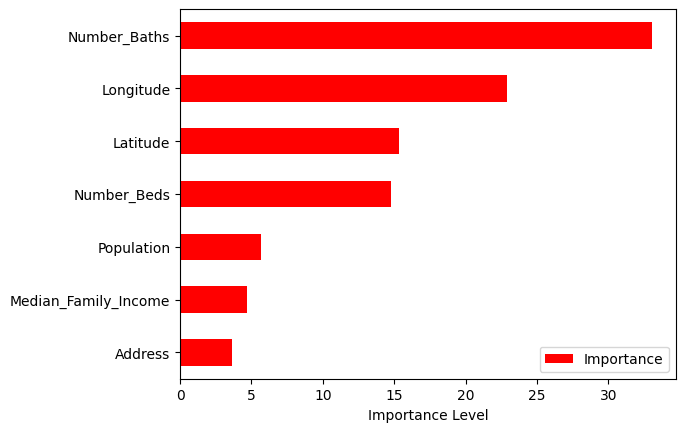

In [60]:
# visualize the ımportance level of ınputs.
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = x_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Importance Level")

We can see the importance levels matches the corrolation values ın heatmap.


In [61]:
#hyperparameter tunning (execution takes 10m) 
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,7],
            'n_estimators' : [ 200, 500, 1000]}
rf_model = RandomForestRegressor(random_state = 42)

#find best parameters with 5 fold cross validation
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 5, 
                            n_jobs = -1) #n_jobs = -1 olarak ayarlandığında, sistemde bulunan tüm işlemcilerin kullanılmasını sağlar.
rf_cv_model.fit(X_train_pca, y_train_pca)
rf_cv_model.best_params_

{'max_depth': 4, 'max_features': 5, 'n_estimators': 1000}

In [62]:
# Build with best parameters.
rf_tuned_pca= RandomForestRegressor(max_depth  = 4, 
                                 max_features = 5, 
                                 n_estimators =1000)

In [63]:

rf_tuned_pca.fit(X_train_pca, y_train_pca)

y_pred_rf_pca = rf_tuned_pca.predict(X_test_pca)

### 2.4. Support Vector Regression

In [93]:
linear_svr_model = SVR(kernel="linear")

param_grid = {'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1, 10]}

# find best parameters by GridSearchCV     
grid_search = GridSearchCV(linear_svr_model,
                            param_grid, 
                            cv=5,
                            n_jobs=2
                        
                            )
grid_search.fit(x_train, y_train)

best_svr_model = grid_search.best_estimator_

best_svr_model.fit(x_train, y_train)


SVR(C=100, kernel='linear')

In [94]:
y_pred_svr = best_svr_model.predict(x_test)

In [96]:
linear_svr_model = SVR(kernel="linear")

param_grid = {'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1, 10]}

# find best parameters by GridSearchCV     
grid_search = GridSearchCV(linear_svr_model,
                            param_grid, 
                            cv=3,
                            n_jobs=2
                        
                            )
grid_search.fit(X_train_pca, y_train_pca)

best_svr_model_pca = grid_search.best_estimator_

best_svr_model_pca.fit(X_train_pca, y_train_pca)

SVR(C=0.1, kernel='linear')

In [97]:

y_pred_svr_pca = best_svr_model_pca.predict(X_test_pca)

### 2.5. Neural Network Regression 

In [ ]:
# it tooks 99 minutes
# Pipeline oluştur
pipeline = make_pipeline(StandardScaler(), MLPRegressor( learning_rate_init=0.01,max_iter=1000))

# define parameter grids
param_grid = {
    'mlpregressor__hidden_layer_sizes': [(50,), (100,), (150,)],
    'mlpregressor__activation': ['relu', 'tanh'],
    'mlpregressor__alpha': [0.0001, 0.001, 0.01],
}

#find best parameters and best model by Gridsearch
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)



'\n# it tooks 99 minutes\n# Pipeline oluştur\npipeline = make_pipeline(StandardScaler(), MLPRegressor( learning_rate_init=0.01,max_iter=1000))\n\n# define parameter grids\nparam_grid = {\n    \'mlpregressor__hidden_layer_sizes\': [(50,), (100,), (150,)],\n    \'mlpregressor__activation\': [\'relu\', \'tanh\'],\n    \'mlpregressor__alpha\': [0.0001, 0.001, 0.01],\n}\n\n#find best parameters and best model by Gridsearch\ngrid_search = GridSearchCV(pipeline, param_grid, cv=5)\ngrid_search.fit(X_train_pca, y_train_pca)\nbest_params = grid_search.best_params_\nbest_model = grid_search.best_estimator_\n\nprint("Best Parameters:", best_params)\n\n# Test kümesi üzerinde en iyi modeli değerlendir\npredictions = best_model.predict(X_test_pca)\nmse = mean_squared_error(y_test_pca, predictions)\nprint("Mean Squared Error:", mse)'

T

In [ ]:
# Create a pipeline with feature scaling and MLP regressor(fit without pca)
pipeline = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(150,),
                                                        activation='tanh',
                                                        solver='adam',
                                                        alpha=0.01,
                                                        batch_size=64,
                                                        learning_rate_init=0.01,
                                                        max_iter=1000,
                                                        random_state=42))

# Train the model
pipeline.fit(x_train, y_train)
# Evaluate the model
predictions = pipeline.predict(x_test)
mse_nn = mean_squared_error(y_test,predictions)
print("Mean Squared Error:", mse_nn)

Mean Squared Error: 0.556677034738723


In [ ]:
mae_neural= mean_absolute_error(y_test,predictions)
mae_neural

0.549361613252088

In [ ]:
r2_neural= r2_score(predictions,y_test)
r2_neural

0.23889809167032194

In [ ]:
# Create a pipeline with feature scaling and MLP regressor(fit without pca)
pipeline = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(150,),
                                                        activation='tanh',
                                                        solver='adam',
                                                        alpha=0.01,
                                                        batch_size=64,
                                                        learning_rate_init=0.01,
                                                        max_iter=1000,
                                                        random_state=42))

# Train the model
pipeline.fit(x_train, y_train)
# Evaluate the model
predictions = pipeline.predict(x_test)
mse_nn = mean_squared_error(y_test,predictions)
print("Mean Squared Error:", mse_nn)

Mean Squared Error: 0.556677034738723


### Gradient Boosting Regression

In [113]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
import numpy as np

# Define the cross-validation strategy
crossValidation = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid
param_grid_= {
    'n_estimators': np.arange(500, 2001, 500),
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [1, 2, 4],
    'subsample': [0.5, 0.75, 1],
    'random_state': [1]
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Initialize Randomized Search Cross Validation
random_search = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid_, n_iter=20, scoring="neg_mean_squared_error", n_jobs=-1, cv=crossValidation, random_state=42)

# Perform Randomized Search
random_search.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_GBR = random_search.best_params_
best_model_GBR = random_search.best_estimator_

# Print best parameters
print("Best Parameters:", best_params_GBR)



Best Parameters: {'subsample': 0.5, 'random_state': 1, 'n_estimators': 2000, 'max_depth': 4, 'learning_rate': 0.01}


In [123]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
import numpy as np

# Define the cross-validation strategy
crossValidation = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': np.arange(500, 2001, 500),
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [1, 2, 4],
    'subsample': [0.5, 0.75, 1],
    'random_state': [1]
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Initialize Randomized Search Cross Validation
random_search_pca = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid, n_iter=20, scoring="neg_mean_squared_error", n_jobs=-1, cv=crossValidation, random_state=42)

# Perform Randomized Search
random_search_pca.fit(X_train_pca, y_train_pca)

# Get the best parameters and the best model
best_params__gbr_PCA = random_search.best_params_
best_model_gbr_PCA = random_search.best_estimator_

# Print best parameters
print("Best Parameters:", best_model_gbr_PCA)



In [116]:
predictions_gbr = best_model_GBR.predict(x_test)


In [121]:
X_test_pca

array([[ 0.95694794, -1.43662657,  0.98481697, -0.2702459 , -0.12740057],
       [ 3.40119747, -1.78077218,  1.3793913 ,  0.66150504, -0.22908376],
       [-2.04019856, -0.99459726,  0.7034577 , -0.93797901,  0.14519552],
       ...,
       [-0.90690562,  3.45569395,  0.20509649,  0.01203244, -0.03819777],
       [-0.65837207,  3.46892845, -0.15274787, -1.13947635, -0.45034645],
       [-1.29029829,  3.51559282,  0.1869025 , -0.03998943, -0.12561945]])

In [122]:
predictions_gbr_pca = best_model_gbr_PCA.predict(X_test_pca)


c:\Users\NURŞAH SATILMIŞ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 5 features, but GradientBoostingRegressor is expecting 7 features as input.

 # 3. EVALUATİON

In [98]:
#multilinear regression evouluation without pca
multi_linear_r2= r2_score(y_test, y_pred_multi_linear)
multi_linear_mse = mean_squared_error(y_test,y_pred_multi_linear)
multi_linear_mae=mean_absolute_error(y_test,y_pred_multi_linear)
 
##multilinear regression evouluation with pca
multi_linear_r2_pca= r2_score(y_test_pca, y_pred_multi_linear_pca)
multi_linear_mse_pca = mean_squared_error(y_test_pca,y_pred_multi_linear_pca) 
multi_linear_mae_pca=mean_absolute_error(y_test_pca,y_pred_multi_linear_pca)
print("Evoluation for multi linear regressor")
print("R2: ", multi_linear_r2 , "MSE: ",multi_linear_mse, "MAE: ", multi_linear_mae)
print("R2 with PCA: ", multi_linear_r2_pca,"MSE with PCA: ", multi_linear_mse_pca," MAE with PCA: ",multi_linear_mae_pca)

Evoluation for multi linear regressor
R2:  0.5020390733222955 MSE:  0.5674623072983639 MAE:  0.5351310547821372
R2 with PCA:  0.593389028445978 MSE with PCA:  0.46336246024422384  MAE with PCA:  0.5504830618312971


In [88]:
# evaluation for kNN Regressor with pca

mse_pca_knn = mean_squared_error(y_test_pca,y_pred_optimal_k_pca)
mae_pca_knn = mean_absolute_error(y_test_pca,y_pred_optimal_k_pca)
r2_optimal_k_pca = r2_score(y_test_pca, y_pred_optimal_k_pca)


# evaluation for kNN Regressor without pca
mse_knn = mean_squared_error(y_test, y_pred_df)
mae_knn = mean_absolute_error(y_test,y_pred_df)
r2_optimal_k = r2_score(y_test, y_pred_df)
print("Evoluation for kNN regressor")

print("R2: ", r2_optimal_k , "          MSE:",mse_knn,"          MAE: ", mae_knn)
print("R2 with PCA:", r2_optimal_k_pca," MSE with PCA:", mse_pca_knn,"  MAE with PCA: ",mae_pca_knn)


Evoluation for kNN regressor
R2:  0.5466087351287618           MSE: 0.5166719706088052           MAE:  0.4885271299211951
R2 with PCA: 0.7497858217319902  MSE with PCA: 0.2851370605843285   MAE with PCA:  0.3854614359138241


In [91]:
# Evaluation for random forest
mse_rf= mean_squared_error(y_pred_rf,y_test)
mse_rf_pca=mean_squared_error(y_pred_rf_pca,y_test_pca)
mae_rf=mean_absolute_error(y_pred_rf,y_test)
mae_rf_pca=mean_absolute_error(y_pred_rf_pca,y_test_pca)
r2_rf=r2_score(y_pred_rf,y_test)
r2_rf_pca= r2_score(y_pred_rf_pca,y_test_pca)
print("Evoluation for random forest regressor")
print("r2 score: ",r2_rf," r2score with pca: ",r2_rf_pca)
print("MAE ",mae_rf,"MAE with PCA:",mae_rf_pca)
print("MSE: ",mse_rf," MSE with pca: ",mse_rf_pca)

Evoluation for random forest regressor
r2 score:  0.4581953696836911  r2score with pca:  0.046004950306092085
MAE  0.3894966270948216 MAE with PCA: 0.5951263200011138
MSE:  0.3388840156629189  MSE with pca:  0.5600574352909398


In [118]:
# Evaluation for SVR 
mse_svr= mean_squared_error(y_pred_svr_pca,y_test)
mse_svr_pca=mean_squared_error(y_pred_svr_pca,y_test_pca)
mae__svr=mean_absolute_error(y_pred_rf,y_test)
mae_svr_pca=mean_absolute_error(y_pred_svr_pca,y_test_pca)
r2_svr=r2_score(y_pred_svr_pca,y_test)
r2_svr_pca= r2_score(y_pred_rf_pca,y_test_pca)
print("r2 score: ",r2_svr," r2score with pca: ",r2_svr_pca)
print("MAE ",mae__svr,"MAE with PCA:",mae_svr_pca)
print("MSE: ",mse_svr," MSE with pca: ",mse_svr_pca)

r2 score:  0.29862259453243223  r2score with pca:  0.046004950306092085
MAE  0.3894966270948216 MAE with PCA: 0.5491219257031906
MSE:  0.4614641471157767  MSE with pca:  0.4614641471157767


In [117]:
# Evaluation for Gradient boosting regression 

mse_gbr= mean_squared_error(predictions_gbr,y_test)
#mse_gbr_pca=mean_squared_error(predicitons_gbr_pca,y_test_pca)
mae__gbr=mean_absolute_error(predictions_gbr,y_test)
#mae_gbr_pca=mean_absolute_error(predicitons_gbr_pca,y_test_pca)
r2_gbr=r2_score(predictions_gbr,y_test)
#r2_gbr_pca= r2_score(predicitons_gbr_pca,y_test_pca)
print("r2 score: ",r2_svr,)
print("MAE ",mae__svr,)
print("MSE: ",mse_svr)

r2 score:  0.29862259453243223
MAE  0.3894966270948216
MSE:  0.4614641471157767
